# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Alvien Andrianto
- **Email:** alvienandrianto@gmail.com
- **ID Dicoding:** alvienandrianto

## Menentukan Pertanyaan Bisnis

- Berapa jumlah pesanan pelanggan dalam tahun tertentu?
- Bagaimana pola pembelian pelanggan berdasarkan lokasi atau wilayah?
- Apakah ada pelanggan yang lebih cenderung melakukan pembelian pada kategori produk tertentu?
- Produk apa yang memiliki penjualan tertinggi dan terendah dalam periode waktu tertentu?
- Kategori produk mana yang menyumbang pendapatan terbesar?
- Apakah ada perbedaan waktu pengiriman berdasarkan wilayah geografis?
- Siapa penjual dengan performa terbaik dan terburuk berdasarkan penjualan dan ulasan?
- Pembayaran dengan metode apa yang paling banyak?

## Import Semua Packages/Library yang Digunakan

In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px

## Data Wrangling

### Gathering Data

In [472]:
#read dataset csv 
customers_df = pd.read_csv("./E-Commerce Public Dataset/customers_dataset.csv")
geolocation_df = pd.read_csv("./E-Commerce Public Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("./E-Commerce Public Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("./E-Commerce Public Dataset/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("./E-Commerce Public Dataset/order_reviews_dataset.csv")
orders_df = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv")
product_category_translation_df = pd.read_csv("./E-Commerce Public Dataset/product_category_name_translation.csv")
products_df = pd.read_csv("./E-Commerce Public Dataset/products_dataset.csv")
sellers_df = pd.read_csv("./E-Commerce Public Dataset/sellers_dataset.csv")

In [473]:
#show customers dataset
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [474]:
#show geolocation dataset
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [475]:
#show order items dataset
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [476]:
#show order payment dataset
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [477]:
#show order review dataset
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [478]:
#show order dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [479]:
#show product category dataset
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [480]:
#show product dataset
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [481]:
#show sellers dataset
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai tabel `customers`

In [482]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [483]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### Menilai tabel `Geolocation`

In [484]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [485]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [486]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### Menilai tabel `Order Items`

In [487]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [488]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [489]:
order_items_df['shipping_limit_date'].describe()

count                  112650
unique                  93318
top       2017-07-21 18:25:23
freq                       21
Name: shipping_limit_date, dtype: object

In [490]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [491]:
print("sum duplicate: ", order_items_df.duplicated().sum())

sum duplicate:  0


#### Menilai tabel `order payment`

In [492]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [493]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [494]:
order_payments_df.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [495]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [496]:
print("sum duplicate: ", order_payments_df.duplicated().sum())

sum duplicate:  0


#### Menilai tabel `order review`

In [497]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [498]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [499]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [500]:
print("sum duplicate: ",order_reviews_df.duplicated().sum())

sum duplicate:  0


#### Menilai tabel `orders`

In [501]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [502]:
column = ['order_purchase_timestamp',
          'order_delivered_carrier_date',
          'order_approved_at',
          'order_delivered_customer_date',
          'order_estimated_delivery_date']

for time in column:
    orders_df[time] = pd.to_datetime(orders_df[time])

In [503]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [504]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [505]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Menilai tabel `product category name trans`

In [506]:
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [507]:
product_category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [508]:
product_category_translation_df.duplicated().sum()

0

#### menilai tabel `products`

In [509]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [510]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [511]:
products_df[products_df['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [512]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### menilai tabel `sellers`

In [513]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [514]:
sellers_df.duplicated().sum()

0

In [515]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### **Insight:**
- In the product table, there are null values in the name column, but the product_id is present.
- Changing type data in orders table from object to timestamp
- There are many type of payment_type
- There are null value in some datetime on orders table
- in order_review, so many review without comment

### Cleaning Data

#### replace NaN value with unknown `products`

In [516]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [517]:
products_df[products_df['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [518]:
# Convert empty strings to NaN
# products_df.replace("", np.nan, inplace=True)

# List of columns to fill
columns_to_fill = [
    "product_category_name",      
    "product_name_lenght",          
    "product_description_lenght",   
    "product_photos_qty",           
    "product_weight_g",                
    "product_length_cm",              
    "product_height_cm",             
    "product_width_cm",
]

# Fill missing values with "Unknown"
products_df[columns_to_fill] = products_df[columns_to_fill].fillna('Unknown')

# Check for null values again
print(products_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


#### changing all data time to timestamp

In [519]:
import pandas as pd

# Change data type on Order Items of shipping_limit_date to date
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Change data type on Order Reviews of review_creation_date and review_answer_timestamp to date
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# Change data type on Order 
# On Assessing data above

#### drop null values on `orders`

In [520]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [521]:
# Drop rows where 'order_approved_at' has null values
orders_df.dropna(subset=['order_approved_at'], inplace=True)

In [522]:
# Drop rows where 'delivered carrier and customers' has null values
orders_df.dropna(subset=['order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)

#### replace NaN value with "not answered" in `order review`

In [523]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [524]:
order_reviews_df[order_reviews_df['review_comment_title'].isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [525]:
columns_to_fill = [
    "review_comment_title",      
    "review_comment_message",          
]

# Fill missing values with "Unknown"
order_reviews_df[columns_to_fill] = order_reviews_df[columns_to_fill].fillna('Not Answered')

# Check for null values again
print(order_reviews_df.isnull().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


#### **Insight:**
- Changing all date format to datetime or timestamp 
- Dropping null values in order_approved_at, if it is not approved then the order is considered failed
- Each region may have a calculation for carrier date and also customers, but there is no algorithm that I can find from the dataset, so I decided to just drop the data that has null values ​​in datetime
- Null on comment its mean no answered

## Exploratory Data Analysis (EDA)

### Explore `Customers`

In [526]:
customers_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "customer_city": "nunique"
})

,customer_id,customer_city
customer_state,,
AC,81,8
AL,413,68
AM,148,5
AP,68,6
BA,3380,353
CE,1336,161
DF,2140,6
ES,2033,95
GO,2020,178


In [527]:
customers_df[customers_df.customer_city == 'sao paulo']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP
22,2938121a40a20953c43caa8c98787fcb,482441ea6a06b1f72fe9784756c0ea75,5713,sao paulo,SP
...,...,...,...,...,...
99408,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP
99411,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP
99422,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP
99423,c6ece8a5137f3c9c3a3a12302a19a2ac,aaf22868003377e859049dcf5f0b3fdf,1323,sao paulo,SP


In [528]:
customer_each_city = customers_df.groupby(by=['customer_city']).agg({'customer_id':'count'}).sort_values(by='customer_id', ascending=False).reset_index().rename(columns={'customer_id':'customer_each_city'})
customer_each_city.head()

,customer_city,customer_each_city
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


### Explore `Geolocation`

In [529]:
counts_by_city = geolocation_df.groupby("geolocation_city").size().sort_values(ascending=False)
print("Counts by city:\n", counts_by_city)


Counts by city:
 geolocation_city
sao paulo             135800
rio de janeiro         62151
belo horizonte         27805
são paulo              24918
curitiba               16593
                       ...  
serra dos dourados         1
guaxima                    1
guia de pacobaíba          1
serra da tapuia            1
* cidade                   1
Length: 8011, dtype: int64


**Insight:**
- xxx
- xxx

### Explore `Orders`

In [530]:
#merge orders_df and orders_items_df
orders_items = pd.merge(left=orders_df, right=order_items_df, on='order_id', how='inner')
orders_items['total_price'] = orders_items.order_item_id * orders_items.price
orders_items.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,19.90


In [531]:
orders_items['delivery_time'] = (orders_items.order_delivered_customer_date - orders_items.order_approved_at).dt.days
orders_items.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,total_price,delivery_time
count,110180,110180,110180,110180,110180,110180.000000,110180,110180.000000,110180.000000,110180.000000,110180.000000
mean,2018-01-02 03:09:05.618805760,2018-01-02 13:40:14.266463744,2018-01-05 09:57:40.877328128,2018-01-14 14:29:00.951887872,2018-01-25 22:27:00.620802304,1.198212,2018-01-08 17:38:11.457660160,119.976817,19.948713,135.954672,11.545471
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,2016-09-19 23:11:33,0.850000,0.000000,0.850000,-7.000000
25%,2017-09-15 08:33:15.249999872,2017-09-15 14:25:19.750000128,2017-09-18 22:46:46.249999872,2017-09-26 20:26:16.249999872,2017-10-06 00:00:00,1.000000,2017-09-21 15:05:55,39.900000,13.080000,45.000000,6.000000
50%,2018-01-21 10:16:58.500000,2018-01-22 13:56:54,2018-01-24 18:59:21,2018-02-02 21:14:55,2018-02-16 00:00:00,1.000000,2018-01-26 20:27:10.500000,74.900000,16.260000,84.000000,9.000000
75%,2018-05-05 15:59:52,2018-05-05 22:30:47.500000,2018-05-08 14:20:00,2018-05-15 20:19:18,2018-05-28 00:00:00,1.000000,2018-05-10 20:19:29.249999872,134.170000,21.150000,149.900000,15.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,13440.000000,208.000000
std,NaN,NaN,NaN,NaN,NaN,0.706726,NaN,182.309380,15.699220,216.025903,9.416083


In [532]:
groupby_status = orders_items.groupby('order_status').agg({
    'order_id': 'count',                
    'total_price': 'sum',              
    'delivery_time': 'mean'             
}).reset_index()

groupby_status.columns = ['Order Status', 'Total Orders', 'Total Price', 'Avg Delivery Time (days)']
print(groupby_status)

  Order Status  Total Orders  Total Price  Avg Delivery Time (days)
0     canceled             7       696.08                 18.000000
1    delivered        110173  14978789.70                 11.545061


In [533]:
# merge order and order payment
orders_items_payments = pd.merge(left=orders_items, right=order_payments_df, on='order_id')
#count each people used type of payment
payment_usage = orders_items_payments['payment_type'].value_counts().reset_index()
payment_usage.columns = ['payment_type', 'usage_count']

print(payment_usage)


  payment_type  usage_count
0  credit_card        84895
1       boleto        22347
2      voucher         6123
3   debit_card         1653


In [534]:
all_orders = pd.merge(left=orders_items_payments, right=order_reviews_df, on='order_id')

In [535]:
all_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,Not Answered,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,Not Answered,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,Not Answered,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,Not Answered,Not Answered,2018-08-18,2018-08-22 19:07:58


In [536]:

# add year and month column
all_orders['purchase_year_month'] = all_orders['order_purchase_timestamp'].dt.to_period('M')

# 
grouped_by_time = all_orders.groupby('purchase_year_month').agg({
    'order_id': 'count',         
    'total_price': 'sum',        
    'delivery_time': 'mean'      
}).reset_index()

# changing column name
grouped_by_time.columns = ['Purchase Year-Month', 'Total Orders', 'Total Price', 'Avg Delivery Time (days)']
print(grouped_by_time)


   Purchase Year-Month  Total Orders  Total Price  Avg Delivery Time (days)
0              2016-10           336     47496.76                 18.758929
1              2016-12             1        10.90                  4.000000
2              2017-01           968    141632.63                 11.587810
3              2017-02          1946    265240.23                 12.069887
4              2017-03          3072    417070.67                 12.214193
5              2017-04          2701    386203.02                 13.644946
6              2017-05          4272    583721.34                 10.366339
7              2017-06          3700    481699.70                 11.248919
8              2017-07          4737    576937.68                 10.514461
9              2017-08          5051    646044.64                  9.997822
10             2017-09          5001    780015.02                 10.993001
11             2017-10          5450    779371.08                 10.761651
12          

### Explore `Products`

In [537]:
products_df.iloc[49:69]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
49,c5d8079278e912d7e3b6beb48ecb56e8,beleza_saude,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
50,5eaa343860dc445b3fd43d1b682809fd,esporte_lazer,53.0,3218.0,5.0,4800.0,60.0,30.0,15.0
51,b5cfb1d3c5e435a7a52227e08f220ee7,cool_stuff,55.0,410.0,2.0,1300.0,36.0,16.0,24.0
52,334479e94cba98064050db1c9636e244,automotivo,57.0,311.0,1.0,220.0,18.0,14.0,17.0
53,3fcd8dfe610c62edfb51de2630cd9ef4,bebes,50.0,509.0,4.0,5700.0,41.0,17.0,49.0
54,4c8056caed5757810b9a68b83c3759e6,malas_acessorios,53.0,1291.0,2.0,450.0,20.0,40.0,30.0
55,30e77af9e7759bbaa0305d2fbc605dc4,fashion_calcados,60.0,402.0,2.0,2000.0,32.0,12.0,37.0
56,92bf5d2084dfbcb57d9db7838bac5cd0,telefonia,51.0,427.0,2.0,100.0,19.0,3.0,11.0
57,fdeb34a9f03fea7c3937dd62d1d0287e,cool_stuff,58.0,1252.0,1.0,1100.0,30.0,20.0,23.0
58,1065dbb6b0bf03daaedab1236979e296,papelaria,49.0,488.0,3.0,1400.0,38.0,40.0,39.0


In [538]:
products_category_translation = pd.merge(left=products_df, right=product_category_translation_df, on='product_category_name')

result_table = products_category_translation[['product_id', 'product_category_name', 'product_category_name_english']]
display(result_table.head(10))


,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,toys


In [539]:
products_category_translation.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32328,32328,32328.0,32328.0,32328.0,32328.0,32328.0,32328.0,32328.0,32328
unique,32328,71,66.0,2960.0,19.0,2202.0,100.0,103.0,96.0,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,11.0,bed_bath_table
freq,1,3029,2179.0,94.0,16483.0,1985.0,5357.0,2507.0,3590.0,3029


### explore `customer`

In [540]:
#merge allorders and customers_df
allorders_customers = pd.merge(left=all_orders, right=customers_df, on='customer_id')
display(allorders_customers.head(5))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,purchase_year_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4,Not Answered,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4,Not Answered,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,4,Not Answered,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,2018-07,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,5,Not Answered,Not Answered,2018-08-18,2018-08-22 19:07:58,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [541]:
allorders_customers_sellers = pd.merge(left=allorders_customers, right=sellers_df, on='seller_id')
display(allorders_customers.sample(5))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,purchase_year_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
61222,4afe7e80b141d6ae78420e2cb79f031f,7ce5f6bb9c62f8fdc44709cf4abd08e8,delivered,2017-11-27 18:09:09,2017-11-27 18:19:28,2017-12-01 19:27:04,2017-12-12 01:43:07,2017-12-26,1,ee0c1cf2fbeae95205b4aa506f1469f0,...,4,Not Answered,Recomendo,2017-12-13,2017-12-15 12:03:05,2017-11,a11a82417165592d24b6888d6c3ee2db,91750,porto alegre,RS
66153,a44d1d870123f5629ab393b99a94882d,f92e28ada7607a8a13a31dd40a1e2ce5,delivered,2018-08-16 20:24:50,2018-08-16 20:35:17,2018-08-17 12:44:00,2018-08-27 19:03:59,2018-09-12,1,e2624fe97e3d11257b2f000e8b96edc6,...,3,Not Answered,Not Answered,2018-08-28,2018-08-30 22:43:56,2018-08,03658a7798d3102fa2c6942dc260d376,23970,paraty,RJ
62886,5a872b37ac143343156a0dc43f1a19fc,2208a5c21b9631036dc7eb52632f493b,delivered,2017-10-10 10:24:59,2017-10-11 03:14:11,2017-10-11 21:13:05,2017-10-20 22:43:30,2017-11-03,1,a5f1e2bdbdb0cd9e44001c416fc3162e,...,5,Not Answered,Not Answered,2017-10-21,2017-10-24 09:56:14,2017-10,4282c18c99da50681a4be25df51c5c3c,37200,lavras,MG
68705,0e24f70accd4e5573b5173a35a773e5d,bc76c33e5eeaec955b0b3e70e77836f5,delivered,2018-01-28 14:09:10,2018-01-28 14:18:26,2018-01-29 22:10:37,2018-02-05 19:48:58,2018-02-20,1,137464dece73fa2dbb54658dbc7aae58,...,2,Not Answered,Paguei por 24 baleiros e veio apenas 21 :(,2018-02-06,2018-02-06 22:19:03,2018-01,654cc929ca2960a54b79cff7bd9b319f,23031,rio de janeiro,RJ
81656,74bb37ec1177c69720bff87b248233cc,365686a7c86e75148a456893fc8c2708,delivered,2017-06-28 12:18:17,2017-06-30 03:15:25,2017-06-30 12:41:55,2017-07-06 13:36:47,2017-07-20,1,45c4df3befb383b0102121f980c20f82,...,5,Not Answered,Not Answered,2017-07-07,2017-07-08 02:22:49,2017-06,8e2e1d4e6eb761a382c637ac69e70f74,12951,atibaia,SP


## Visualization & Explanatory Analysis

In [542]:
all_dataset = pd.merge(left=allorders_customers_sellers, right=products_category_translation, on='product_id')
# all_dataset.sample(10)
all_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113194 entries, 0 to 113193
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113194 non-null  object        
 1   customer_id                    113194 non-null  object        
 2   order_status                   113194 non-null  object        
 3   order_purchase_timestamp       113194 non-null  datetime64[ns]
 4   order_approved_at              113194 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113194 non-null  datetime64[ns]
 6   order_delivered_customer_date  113194 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113194 non-null  datetime64[ns]
 8   order_item_id                  113194 non-null  int64         
 9   product_id                     113194 non-null  object        
 10  seller_id                      113194 non-null  object        
 11  

### Pertanyaan 1: Berapa rata-rata jumlah pesanan per pelanggan dalam periode tertentu?

In [543]:
# Calculate average orders per customer
orders_per_customer = all_dataset['customer_id'].value_counts()
average_orders_per_customer = orders_per_customer.mean()

print(f"Rata-rata jumlah pesanan per pelanggan: {average_orders_per_customer:.2f}")

Rata-rata jumlah pesanan per pelanggan: 1.20


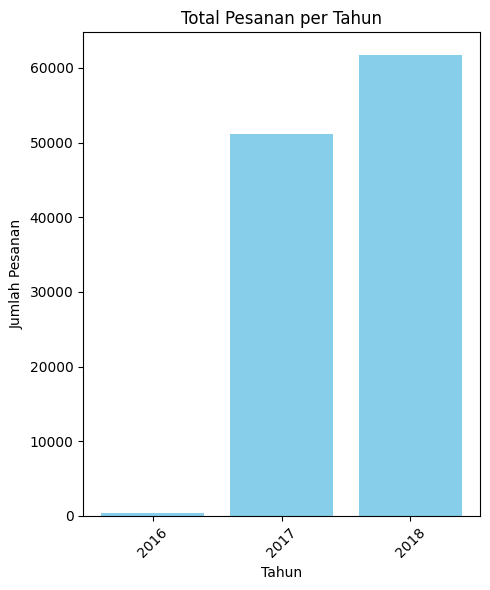

   year  total_orders
0  2016           335
1  2017         51184
2  2018         61675


In [544]:
#convert period to year only
all_dataset['year'] = all_dataset['purchase_year_month'].dt.year

# Menghitung jumlah pesanan per tahun
yearly_data = all_dataset.groupby('year').agg(
    total_orders=('order_id', 'count')
).reset_index()

# Visualisasi
plt.figure(figsize=(5, 6))

# Plot total orders
plt.bar(yearly_data['year'], yearly_data['total_orders'], color='skyblue')
plt.title('Total Pesanan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(yearly_data['year'], rotation=45)

plt.tight_layout()
plt.show()

# Menampilkan data tahunan
print(yearly_data)


### Pertanyaan 2: Bagaimana pola pembelian pelanggan berdasarkan lokasi geografis?

                       City  Total_Orders
3552              sao paulo         14713
3117         rio de janeiro          6427
448          belo horizonte          2633
552                brasilia          2032
1133               curitiba          1466
699                campinas          1379
2927           porto alegre          1317
3209               salvador          1154
1515              guarulhos          1118
3389  sao bernardo do campo           891


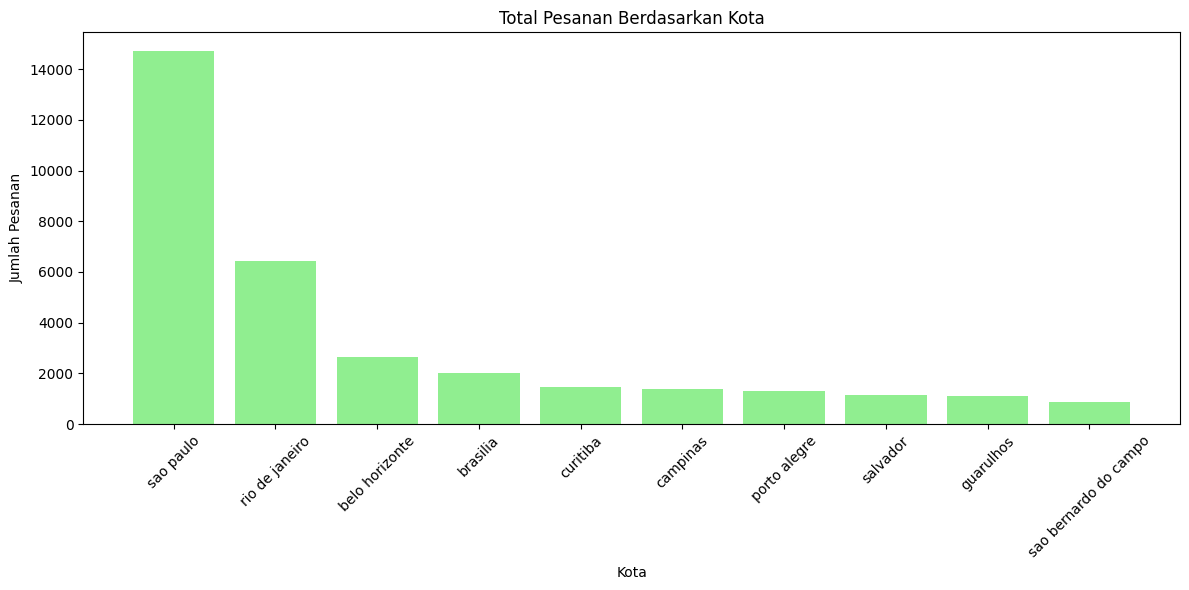

In [545]:

# Hitung jumlah pesanan berdasarkan kota
city_orders = all_dataset.groupby('customer_city').order_id.nunique().reset_index()
city_orders.columns = ['City', 'Total_Orders']

# Mengurutkan berdasarkan Total_Orders
city_orders = city_orders.sort_values(by='Total_Orders', ascending=False)

# Menampilkan beberapa baris teratas
print(city_orders.head(10))

# Visualisasi pola pembelian berdasarkan kota
plt.figure(figsize=(12, 6))
plt.bar(city_orders['City'][:10], city_orders['Total_Orders'][:10], color='lightgreen')
plt.title('Total Pesanan Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan beberapa baris teratas
# print(city_orders.head(10))


### Pertanyaan 3: Apakah ada pelanggan yang lebih cenderung melakukan pembelian pada kategori produk tertentu?

In [546]:
# Menghitung jumlah pesanan per kategori produk dan bulan
category_month_df = all_dataset.groupby(['purchase_year_month', 'product_category_name_english']).order_id.nunique().reset_index()
category_month_df.columns = ['Month', 'Product_Category', 'Total_Orders']

category_month_df = category_month_df.sort_values(by='Total_Orders', ascending=False)

# Menampilkan beberapa baris teratas
print(category_month_df.head(20))

        Month       Product_Category  Total_Orders
603   2017-11         bed_bath_table           795
1086  2018-06          health_beauty           787
801   2018-02  computers_accessories           786
1215  2018-08          health_beauty           763
1151  2018-07          health_beauty           695
729   2018-01         bed_bath_table           681
1023  2018-05          health_beauty           668
1054  2018-06         bed_bath_table           646
858   2018-03         bed_bath_table           643
912   2018-03         sports_leisure           638
864   2018-03  computers_accessories           627
958   2018-04          health_beauty           614
891   2018-03          health_beauty           601
925   2018-04         bed_bath_table           595
992   2018-05         bed_bath_table           593
827   2018-02          health_beauty           592
1047  2018-05          watches_gifts           584
795   2018-02         bed_bath_table           582
783   2018-01         sports_le

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\2881153145.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




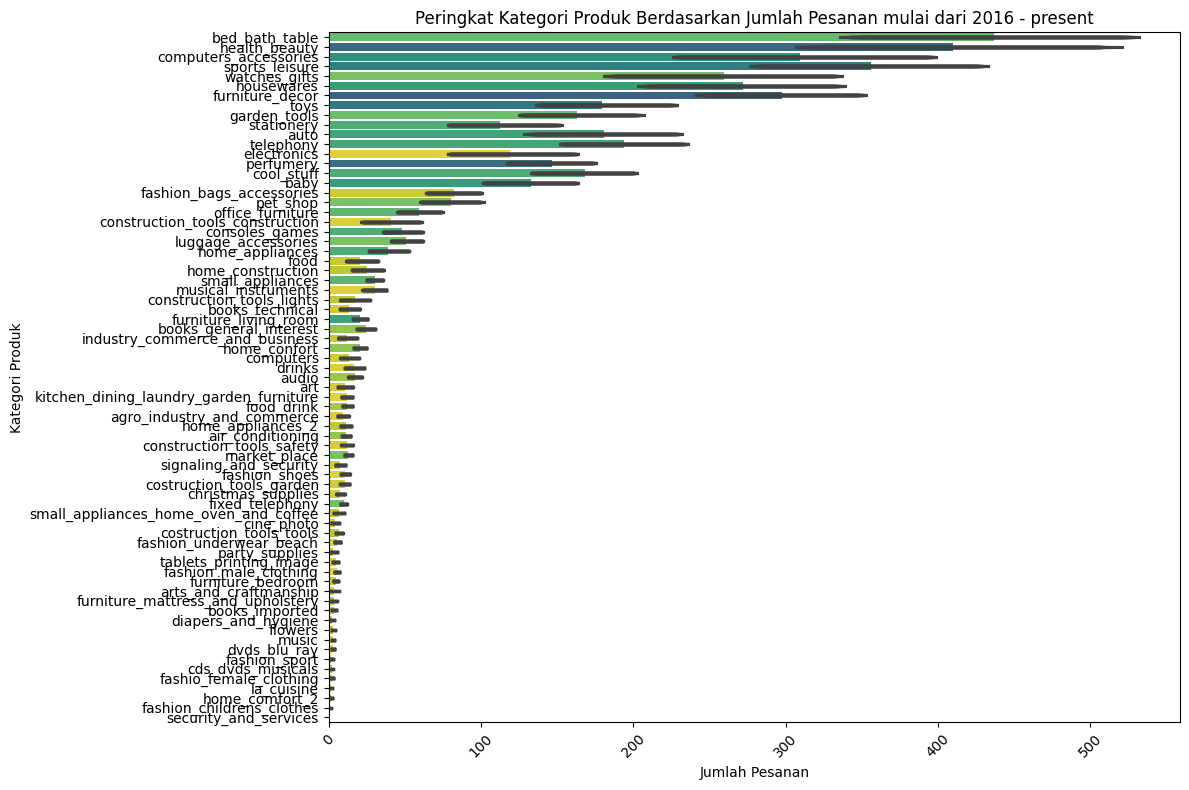

In [547]:
# Menghitung jumlah pesanan per kategori produk dan bulan
category_month_df = all_dataset.groupby(['purchase_year_month', 'product_category_name_english']).order_id.nunique().reset_index()
category_month_df.columns = ['Month', 'Product_Category', 'Total_Orders']

# Mengurutkan berdasarkan Total Orders dari tertinggi ke terendah
category_month_df = category_month_df.sort_values(by='Total_Orders', ascending=False)

# Menambahkan kolom peringkat
category_month_df['Rank'] = category_month_df['Total_Orders'].rank(method='min', ascending=False)

# Menampilkan data peringkat untuk tahun tertentu, misalnya 2017
ranked_2017 = category_month_df[category_month_df['Month'].dt.year >= 2016]

# Membuat grafik batang untuk peringkat
plt.figure(figsize=(12, 8))
sns.barplot(data=ranked_2017, x='Total_Orders', y='Product_Category', palette='viridis', order=ranked_2017.sort_values('Rank')['Product_Category'])

plt.title('Peringkat Kategori Produk Berdasarkan Jumlah Pesanan mulai dari 2016 - present')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pertanyaan 4: Produk apa yang memiliki penjualan tertinggi dan terendah dalam periode waktu tertentu?

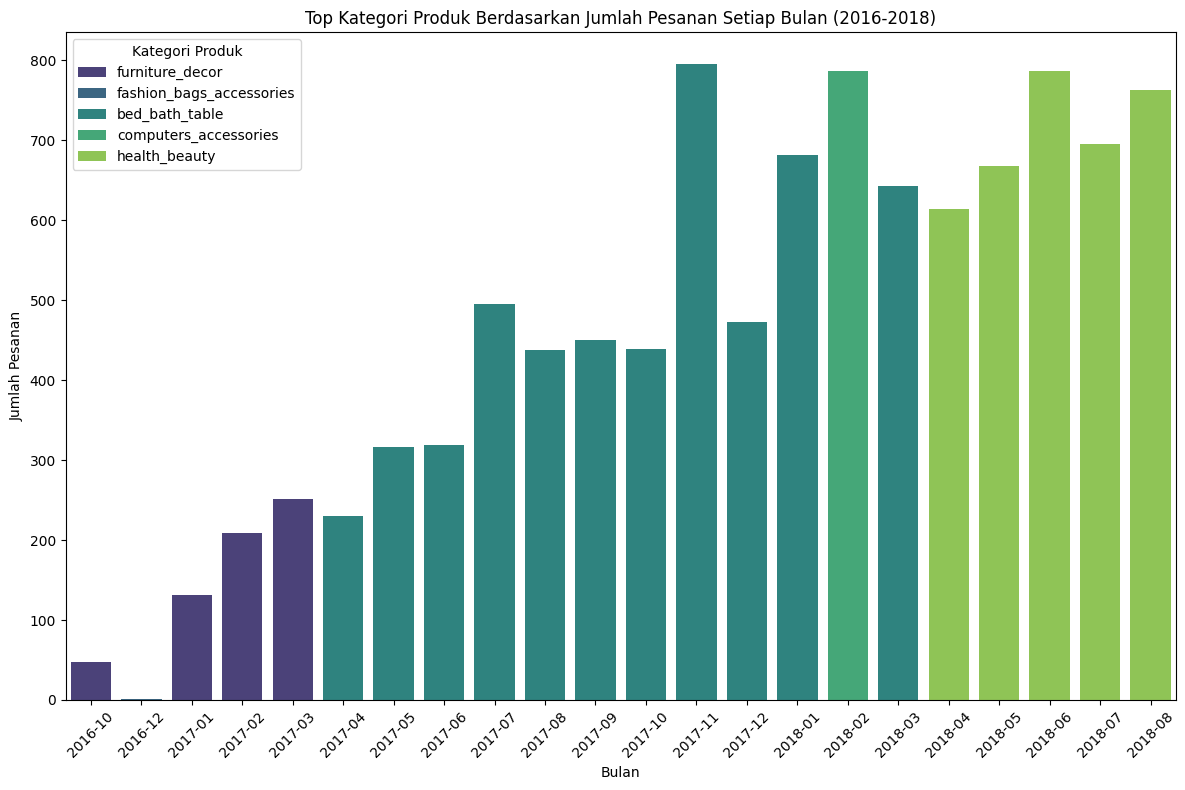

        Month          Product_Category  Total_Orders
16    2016-10           furniture_decor            48
29    2016-12  fashion_bags_accessories             1
50    2017-01           furniture_decor           131
97    2017-02           furniture_decor           209
146   2017-03           furniture_decor           251
178   2017-04            bed_bath_table           230
236   2017-05            bed_bath_table           316
293   2017-06            bed_bath_table           319
353   2017-07            bed_bath_table           495
413   2017-08            bed_bath_table           438
475   2017-09            bed_bath_table           450
540   2017-10            bed_bath_table           439
603   2017-11            bed_bath_table           795
667   2017-12            bed_bath_table           472
729   2018-01            bed_bath_table           681
801   2018-02     computers_accessories           786
858   2018-03            bed_bath_table           643
958   2018-04             he

In [548]:
top_categories = category_month_df.loc[category_month_df.groupby('Month')['Total_Orders'].idxmax()]

# Menyortir data berdasarkan bulan
top_categories = top_categories.sort_values(by='Month')

# Membuat grafik batang untuk kategori produk teratas per bulan
plt.figure(figsize=(12, 8))
sns.barplot(data=top_categories, x='Month', y='Total_Orders', hue='Product_Category', palette='viridis')

plt.title('Top Kategori Produk Berdasarkan Jumlah Pesanan Setiap Bulan (2016-2018)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()

# Menampilkan hasil top kategori per bulan
print(top_categories[['Month', 'Product_Category', 'Total_Orders']])

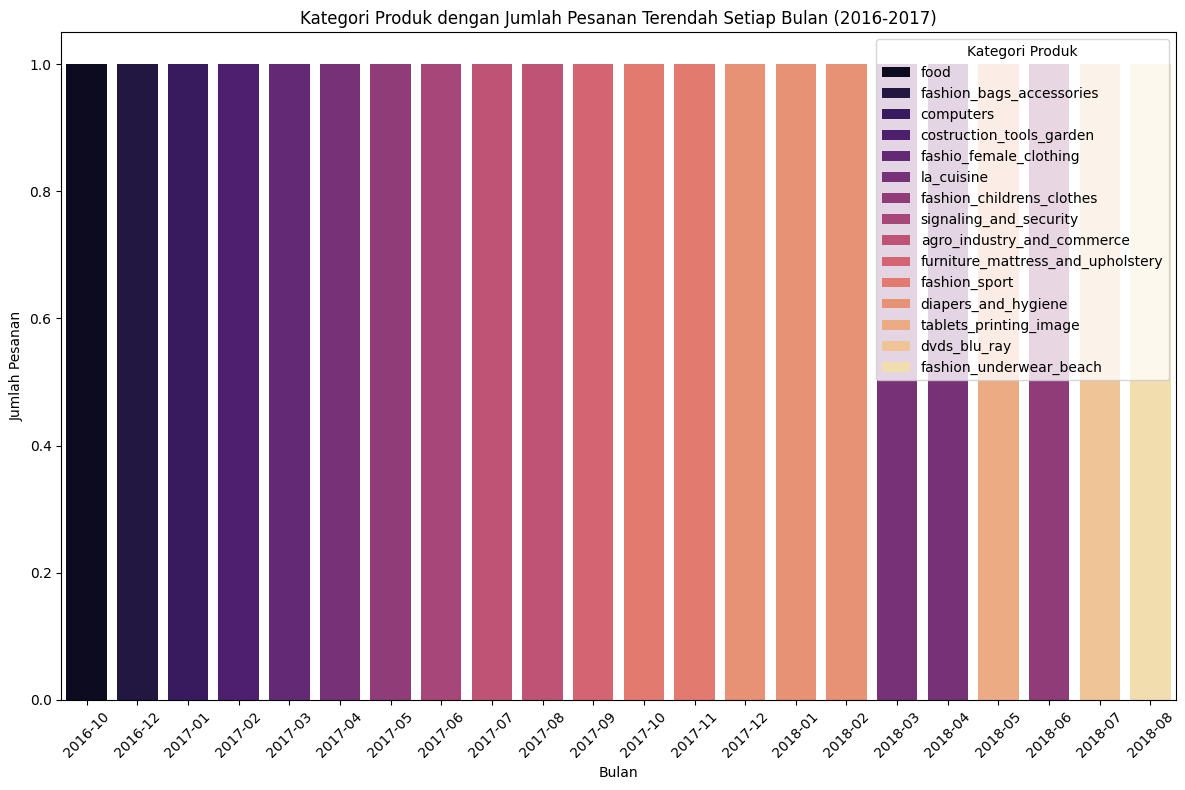

        Month                   Product_Category  Total_Orders
15    2016-10                               food             1
29    2016-12           fashion_bags_accessories             1
36    2017-01                          computers             1
86    2017-02           costruction_tools_garden             1
137   2017-03             fashio_female_clothing             1
213   2017-04                         la_cuisine             1
251   2017-05          fashion_childrens_clothes             1
337   2017-06             signaling_and_security             1
346   2017-07         agro_industry_and_commerce             1
407   2017-08         agro_industry_and_commerce             1
506   2017-09  furniture_mattress_and_upholstery             1
562   2017-10                      fashion_sport             1
626   2017-11                      fashion_sport             1
682   2017-12                diapers_and_hygiene             1
744   2018-01                diapers_and_hygiene       

In [549]:
lowest_categories = category_month_df.loc[category_month_df.groupby('Month')['Total_Orders'].idxmin()]

# Menyortir data berdasarkan bulan
lowest_categories = lowest_categories.sort_values(by='Month')

# Membuat grafik batang untuk kategori produk terendah per bulan
plt.figure(figsize=(12, 8))
sns.barplot(data=lowest_categories, x='Month', y='Total_Orders', hue='Product_Category', palette='magma')

plt.title('Kategori Produk dengan Jumlah Pesanan Terendah Setiap Bulan (2016-2017)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()

# Menampilkan hasil kategori terendah per bulan
print(lowest_categories[['Month', 'Product_Category', 'Total_Orders']])

In [550]:
all_categories = all_dataset['product_category_name_english'].unique()

category_sales = all_dataset.groupby('product_category_name_english').order_id.nunique().reset_index()
category_sales.columns = ['Product_Category', 'Total_Orders']

no_sales_categories = category_sales[category_sales['Total_Orders'] == 0]

# Menggabungkan dengan semua kategori untuk menemukan kategori yang tidak terjual
no_sales_categories_list = set(all_categories) - set(category_sales['Product_Category'])

# Menampilkan kategori produk yang tidak terjual
if no_sales_categories_list:
    print("Kategori produk yang tidak terjual sama sekali:")
    print(no_sales_categories_list)
else:
    print("Semua kategori produk memiliki setidaknya satu penjualan.")

Semua kategori produk memiliki setidaknya satu penjualan.


In [551]:
all_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'total_price', 'delivery_time',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'purchase_year_month', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e

In [552]:
# Menghitung total penjualan per kategori
total_penjualan_kategori = all_dataset.groupby('product_category_name_english')['order_id'].count().reset_index()

# Mengganti nama kolom untuk kejelasan
total_penjualan_kategori.columns = ['product_category_name_english', 'total_jumlah_penjualan']

# Mengurutkan kategori berdasarkan total penjualan dari yang terbanyak
total_penjualan_kategori = total_penjualan_kategori.sort_values(by='total_jumlah_penjualan', ascending=False)

# Menampilkan total penjualan berdasarkan kategori
print(total_penjualan_kategori)


   product_category_name_english  total_jumlah_penjualan
7                 bed_bath_table                   11684
43                 health_beauty                    9749
65                sports_leisure                    8734
39               furniture_decor                    8554
15         computers_accessories                    7926
..                           ...                     ...
3          arts_and_craftmanship                      24
52                    la_cuisine                      15
11             cds_dvds_musicals                      14
29     fashion_childrens_clothes                       7
61         security_and_services                       2

[71 rows x 2 columns]


In [553]:
# Menghitung jumlah pesanan per produk dengan kategori
product_sales = all_dataset.groupby(['product_id', 'product_category_name_english'])['order_id'].nunique().reset_index()
product_sales.columns = ['Product_ID', 'Product_Category', 'Total_Orders']
product_sales.head(10)

,Product_ID,Product_Category,Total_Orders
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery,1
1,00088930e925c41fd95ebfe695fd2655,auto,1
2,0009406fd7479715e4bef61dd91f2462,bed_bath_table,1
3,000b8f95fcb9e0096488278317764d19,housewares,2
4,000d9be29b5207b54e86aa1b1ac54872,watches_gifts,1
5,0011c512eb256aa0dbbb544d8dffcf6e,auto,1
6,00126f27c813603687e6ce486d909d01,cool_stuff,2
7,001795ec6f1b187d37335e1c4704762e,consoles_games,7
8,001b237c0e9bb435f2e54071129237e9,bed_bath_table,1
9,001b72dfd63e9833e8c02742adf472e3,furniture_decor,11


In [554]:
# Mengidentifikasi produk dengan penjualan tertinggi
top_product = product_sales.loc[product_sales['Total_Orders'].idxmax()]
print("Produk dengan penjualan tertinggi:")
print(top_product, "\n")

# Mengidentifikasi produk dengan penjualan terendah
lowest_product = product_sales.loc[product_sales['Total_Orders'].idxmin()]
print("Produk dengan penjualan terendah:")
print(lowest_product, "\n")


Produk dengan penjualan tertinggi:
Product_ID          99a4788cb24856965c36a24e339b6058
Product_Category                      bed_bath_table
Total_Orders                                     448
Name: 18854, dtype: object 

Produk dengan penjualan terendah:
Product_ID          00066f42aeeb9f3007548bb9d3f33c38
Product_Category                           perfumery
Total_Orders                                       1
Name: 0, dtype: object 



### Pertanyaan 5: Kategori produk mana yang menyumbang pendapatan terbesar?

In [555]:
# Menghitung total pendapatan per kategori produk
total_pendapatan_kategori = all_dataset.groupby('product_category_name_english')['total_price'].sum().reset_index()

# Mengganti nama kolom untuk kejelasan
total_pendapatan_kategori.columns = ['product_category_name_english', 'total_pendapatan']

# Mengurutkan kategori berdasarkan total pendapatan dari yang terbesar
total_pendapatan_kategori = total_pendapatan_kategori.sort_values(by='total_pendapatan', ascending=False)

# Menampilkan kategori produk yang menyumbang pendapatan terbesar
print(total_pendapatan_kategori.head(10))  # Menampilkan 10 kategori teratas


   product_category_name_english  total_pendapatan
43                 health_beauty        1357165.58
7                 bed_bath_table        1286207.58
70                 watches_gifts        1262017.36
15         computers_accessories        1145449.40
65                sports_leisure        1084995.75
39               furniture_decor         945272.29
49                    housewares         767852.44
20                    cool_stuff         650007.26
5                           auto         648863.83
42                  garden_tools         587191.13


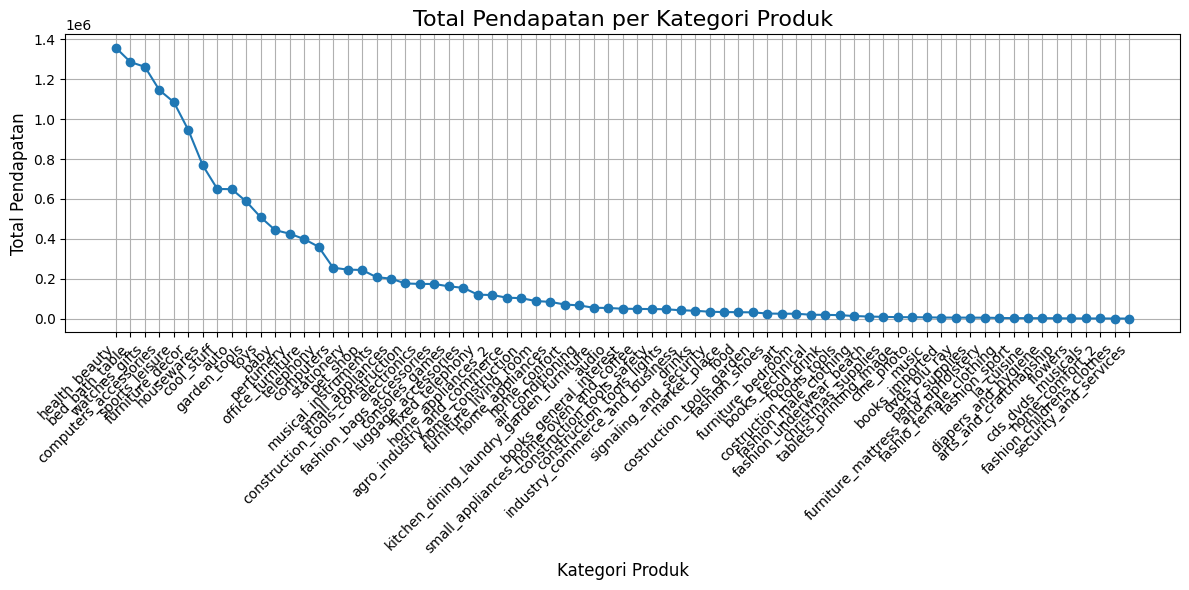

In [556]:
# Menghitung total pendapatan per kategori produk
total_pendapatan_kategori = all_dataset.groupby('product_category_name_english')['total_price'].sum().reset_index()

# Mengganti nama kolom untuk kejelasan
total_pendapatan_kategori.columns = ['product_category_name_english', 'total_pendapatan']

# Mengurutkan kategori berdasarkan total pendapatan dari yang terbesar
total_pendapatan_kategori = total_pendapatan_kategori.sort_values(by='total_pendapatan', ascending=False)

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(total_pendapatan_kategori['product_category_name_english'], total_pendapatan_kategori['total_pendapatan'], marker='o')

# Menambahkan judul dan label
plt.title('Total Pendapatan per Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x untuk keterbacaan
plt.grid()
plt.tight_layout()  # Mengatur layout untuk menghindari potongan label
plt.show()


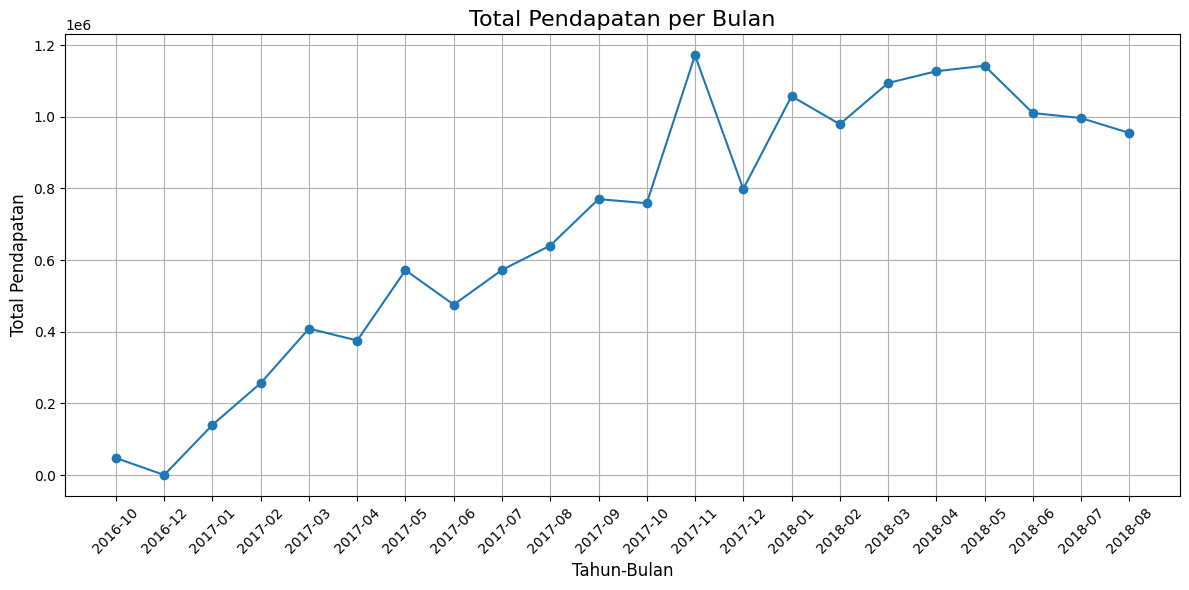

In [557]:
# Pastikan kolom 'order_purchase_timestamp' dalam format datetime
all_dataset['order_purchase_timestamp'] = pd.to_datetime(all_dataset['order_purchase_timestamp'])

# Menambahkan kolom 'bulan' dan 'tahun' untuk pengelompokan
all_dataset['bulan'] = all_dataset['order_purchase_timestamp'].dt.month
all_dataset['tahun'] = all_dataset['order_purchase_timestamp'].dt.year

# Menghitung total pendapatan per bulan
total_pendapatan_bulan = all_dataset.groupby(['tahun', 'bulan'])['total_price'].sum().reset_index()

# Membuat kolom baru untuk menyimpan informasi tahun-bulan
total_pendapatan_bulan['tahun_bulan'] = total_pendapatan_bulan['tahun'].astype(str) + '-' + total_pendapatan_bulan['bulan'].astype(str).str.zfill(2)

# Mengurutkan data berdasarkan tahun dan bulan
total_pendapatan_bulan = total_pendapatan_bulan.sort_values(by=['tahun', 'bulan'])

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(total_pendapatan_bulan['tahun_bulan'], total_pendapatan_bulan['total_price'], marker='o', linestyle='-')

# Menambahkan judul dan label
plt.title('Total Pendapatan per Bulan', fontsize=16)
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)
plt.xticks(rotation=45)  # Memutar label sumbu x untuk keterbacaan
plt.grid()
plt.tight_layout()  # Mengatur layout untuk menghindari potongan label
plt.show()


### Pertanyaan 6: Apakah ada perbedaan waktu pengiriman berdasarkan wilayah geografis?

In [558]:
# Menghitung waktu pengiriman (dalam hari)
all_dataset['waktu_pengiriman'] = (all_dataset['order_delivered_customer_date'] - all_dataset['order_purchase_timestamp']).dt.days

# Menghitung rata-rata waktu pengiriman per kota
rata_waktu_pengiriman_kota = all_dataset.groupby('customer_city')['waktu_pengiriman'].mean().reset_index()
rata_waktu_pengiriman_kota.columns = ['customer_city', 'rata_waktu_pengiriman']

# Membulatkan rata-rata waktu pengiriman menjadi 2 angka di belakang koma
rata_waktu_pengiriman_kota['rata_waktu_pengiriman'] = rata_waktu_pengiriman_kota['rata_waktu_pengiriman'].round(2)
# Menampilkan hasil rata-rata waktu pengiriman per kota

print("Rata-rata Waktu Pengiriman per Kota:")
print(rata_waktu_pengiriman_kota.sort_values(by='rata_waktu_pengiriman'))

Rata-rata Waktu Pengiriman per Kota:
            customer_city  rata_waktu_pengiriman
1667               iomere                   2.00
22                acucena                   3.00
3697               siriji                   3.00
1032             contenda                   3.00
456        bento de abreu                   3.33
...                   ...                    ...
229                 arace                  85.75
3236  santa cruz de goias                  86.00
24      adhemar de barros                  97.00
788     capinzal do norte                 109.00
2519          novo brasil                 148.00

[4071 rows x 2 columns]



Rata-rata Waktu Pengiriman per Provinsi:
   customer_state  rata_waktu_pengiriman
25             SP                   8.26
10             MG                  11.48
17             PR                  11.50
6              DF                  12.49
23             SC                  14.38
22             RS                  14.68
18             RJ                  14.72
8              GO                  14.79
11             MS                  15.06
7              ES                  15.08
26             TO                  16.68
12             MT                  17.41
15             PE                  17.71
4              BA                  18.68
16             PI                  18.88
19             RN                  19.22
20             RO                  19.36
14             PB                  19.95
0              AC                  20.15
5              CE                  20.20
24             SE                  20.78
9              MA                  21.10
13             

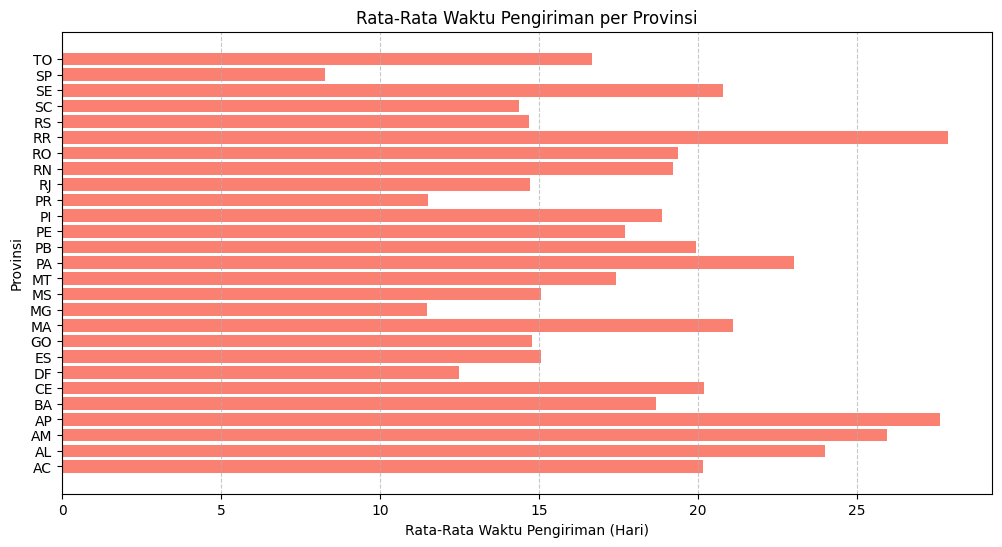

In [559]:
# Menghitung rata-rata waktu pengiriman per provinsi (state)
rata_waktu_pengiriman_state = all_dataset.groupby('customer_state')['waktu_pengiriman'].mean().reset_index()
rata_waktu_pengiriman_state.columns = ['customer_state', 'rata_waktu_pengiriman']

rata_waktu_pengiriman_state['rata_waktu_pengiriman'] = rata_waktu_pengiriman_state['rata_waktu_pengiriman'].round(2)

# Menampilkan hasil rata-rata waktu pengiriman per provinsi
print("\nRata-rata Waktu Pengiriman per Provinsi:")
print(rata_waktu_pengiriman_state.sort_values(by='rata_waktu_pengiriman'))

# Plot untuk rata-rata waktu pengiriman per provinsi
plt.figure(figsize=(12, 6))
plt.barh(rata_waktu_pengiriman_state['customer_state'], rata_waktu_pengiriman_state['rata_waktu_pengiriman'], color='salmon')
plt.xlabel('Rata-Rata Waktu Pengiriman (Hari)')
plt.ylabel('Provinsi')
plt.title('Rata-Rata Waktu Pengiriman per Provinsi')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 7: Siapa penjual dengan performa terbaik dan terburuk berdasarkan penjualan dan ulasan?

In [560]:
# Menghitung total penjualan per seller
total_penjualan = all_dataset.groupby('seller_id')['order_id'].count().reset_index()
total_penjualan.columns = ['seller_id', 'total_penjualan']

# Menghitung rata-rata ulasan per seller
rata_ulasan = all_dataset.groupby('seller_id')['review_score'].mean().reset_index()
rata_ulasan.columns = ['seller_id', 'rata_ulasan']

# Menggabungkan total penjualan dan rata-rata ulasan
performansi_seller = pd.merge(total_penjualan, rata_ulasan, on='seller_id')

# Menentukan seller dengan performa terbaik dan terburuk
penjual_terbaik = performansi_seller.loc[performansi_seller['total_penjualan'].idxmax()]
penjual_terburuk = performansi_seller.loc[performansi_seller['total_penjualan'].idxmin()]

# Menampilkan hasil
print("Penjual dengan Performa Terbaik:")
print(penjual_terbaik)

print("\nPenjual dengan Performa Terburuk:")
print(penjual_terburuk)


Penjual dengan Performa Terbaik:
seller_id          4a3ca9315b744ce9f8e9374361493884
total_penjualan                                2093
rata_ulasan                                3.824654
Name: 842, dtype: object

Penjual dengan Performa Terburuk:
seller_id          00ab3eff1b5192e5f1a63bcecfee11c8
total_penjualan                                   1
rata_ulasan                                     5.0
Name: 5, dtype: object


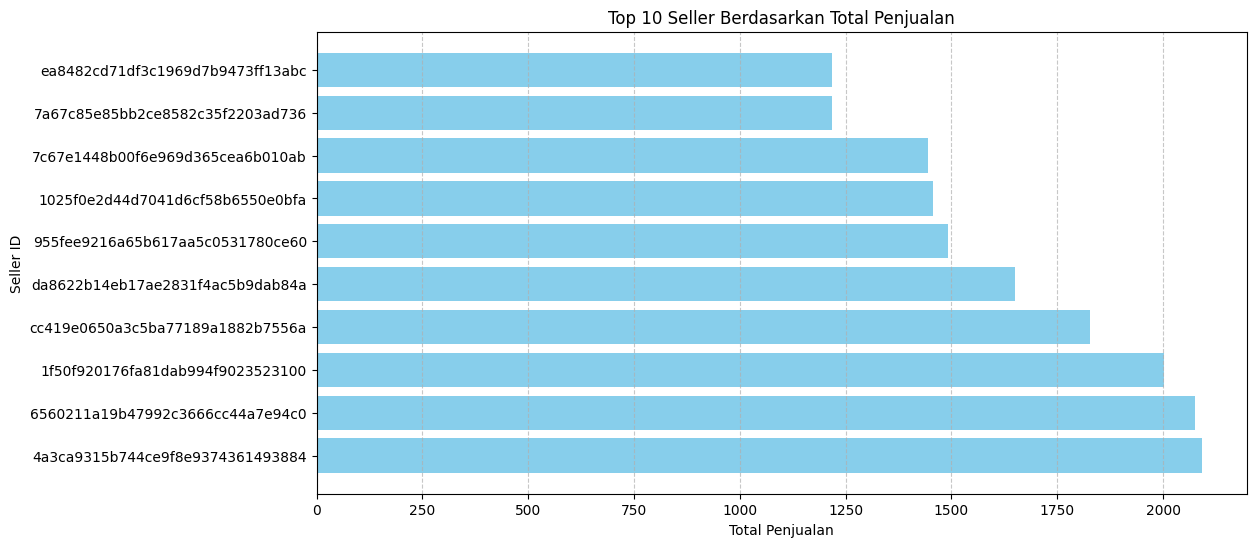

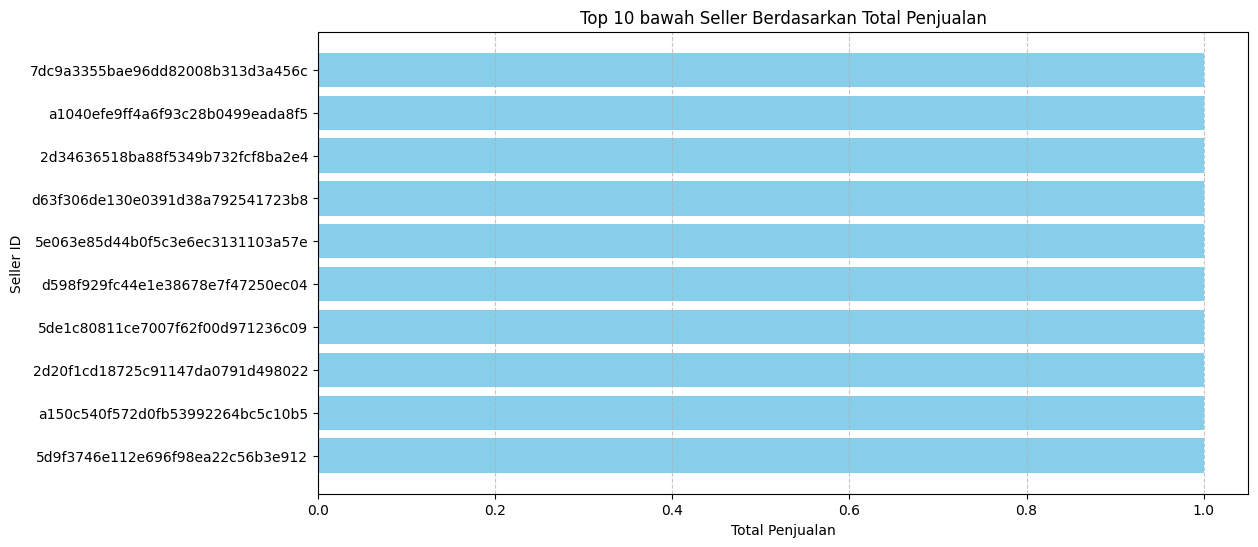

In [561]:
# Menghitung total penjualan per seller
total_penjualan = all_dataset.groupby('seller_id')['order_id'].count().reset_index()
total_penjualan.columns = ['seller_id', 'total_penjualan']

# Mengurutkan berdasarkan total penjualan
total_penjualan = total_penjualan.sort_values(by='total_penjualan', ascending=False)
top_10_penjualan = total_penjualan.head(10)
top_10_bawah_penjualan = total_penjualan.tail(10)

# Plot grafik
plt.figure(figsize=(12, 6))
plt.barh(top_10_penjualan['seller_id'].astype(str), top_10_penjualan['total_penjualan'], color='skyblue')
plt.xlabel('Total Penjualan')
plt.ylabel('Seller ID')
plt.title('Top 10 Seller Berdasarkan Total Penjualan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(top_10_bawah_penjualan['seller_id'].astype(str), top_10_bawah_penjualan['total_penjualan'], color='skyblue')
plt.xlabel('Total Penjualan')
plt.ylabel('Seller ID')
plt.title('Top 10 bawah Seller Berdasarkan Total Penjualan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 8: Pembayaran dengan metode apa yang paling banyak?

In [562]:
# Menghitung jumlah pembayaran berdasarkan metode pembayaran
jumlah_pembayaran = all_dataset['payment_type'].value_counts().reset_index()
jumlah_pembayaran.columns = ['payment_type', 'jumlah']

# Mengurutkan berdasarkan jumlah pembayaran
jumlah_pembayaran = jumlah_pembayaran.sort_values(by='jumlah', ascending=False)

# Menampilkan hasil
print("Metode Pembayaran Paling Banyak:")
print(jumlah_pembayaran)


Metode Pembayaran Paling Banyak:
  payment_type  jumlah
0  credit_card   83535
1       boleto   22015
2      voucher    6022
3   debit_card    1622


## Analisis Lanjutan (Opsional)

In [563]:
all_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'total_price', 'delivery_time',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'purchase_year_month', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_e

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\538404226.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\538404226.py:39: UserWarning:


The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\538404226.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\538404226.py:46: UserWarning:


The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\538404226.py:53: FutureWarning:



Passing `pal

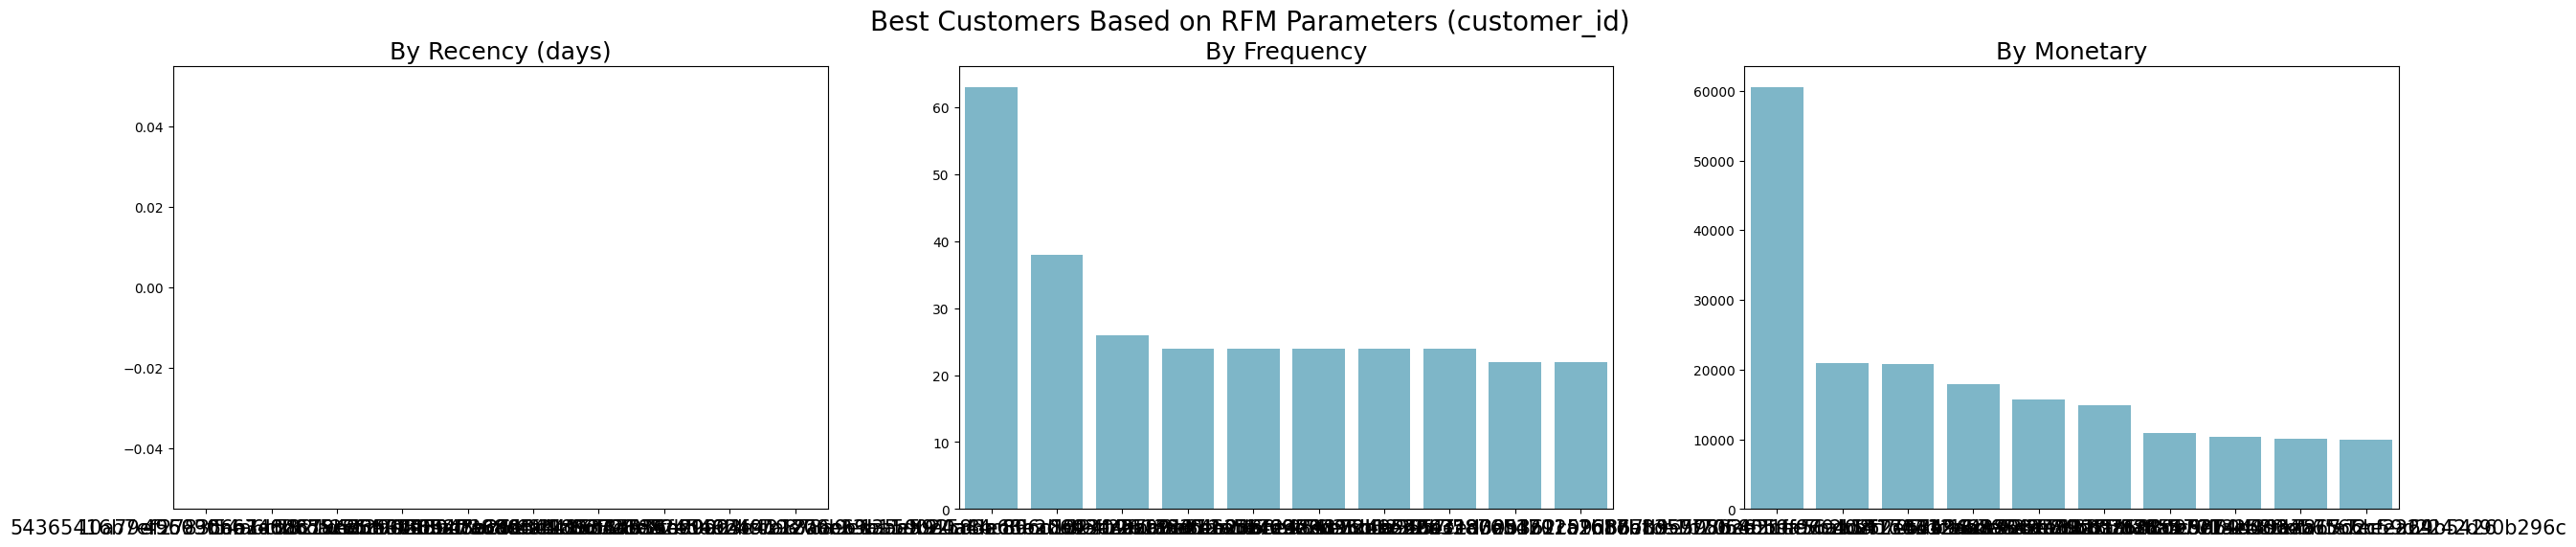

In [564]:
def rfm_analysis(dataframe):
    # Group by customer_id and calculate required metrics
    aggregated_data = dataframe.groupby(by='customer_id', as_index=False).agg({
        'order_purchase_timestamp': 'max',  # Latest order date
        'order_id': 'count',                 # Total number of orders
        'total_price': 'sum'                 # Total monetary value
    })

    # Rename the columns for clarity
    aggregated_data.columns = ["customer_id", "last_order_date", "frequency", "monetary"]

    # Convert the last order date to a date format
    aggregated_data["last_order_date"] = aggregated_data.last_order_date.dt.date

    # Get the most recent date in the dataset
    most_recent_date = dataframe.order_purchase_timestamp.dt.date.max()

    # Calculate recency
    aggregated_data["recency"] = aggregated_data["last_order_date"].apply(lambda x: (most_recent_date - x).days)

    # Create a short customer ID for reference
    aggregated_data['short_cust_id'] = aggregated_data.customer_id.str.slice(start=25)

    # Drop the last order date column as it's no longer needed
    aggregated_data.drop("last_order_date", axis=1, inplace=True)

    return aggregated_data

# Perform RFM analysis and sort by recency, frequency, and monetary
rfm_result = rfm_analysis(all_dataset)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Define colors for the bars
colors = ["#72BCD4"] * 5  # Same color for all bars

# Plot for Recency
sns.barplot(y="recency", x="customer_id", data=rfm_result.sort_values(by="recency", ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plot for Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_result.sort_values(by="frequency", ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot for Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_result.sort_values(by="monetary", ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Overall title for the plots
plt.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


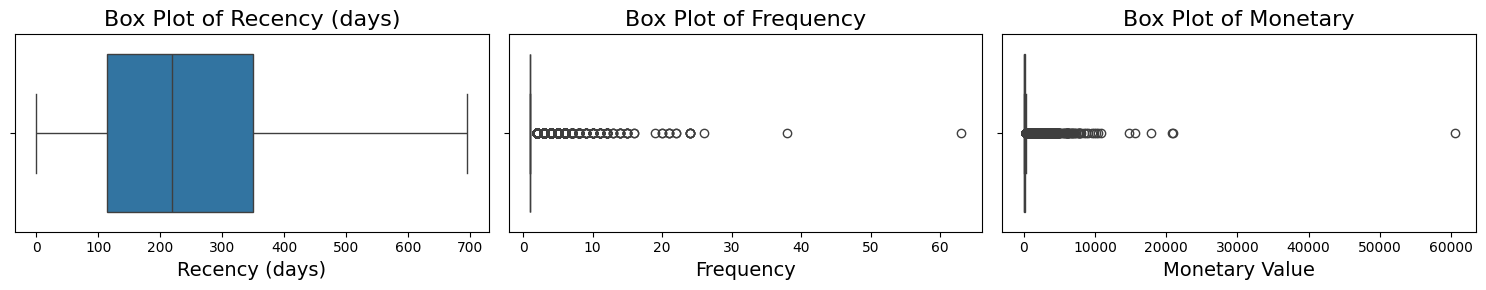

In [565]:
df = rfm_analysis(all_dataset)  # Run RFM analysis to get recency, frequency, monetary data

# Create subplots for box plots
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

# Box plot for Recency
sns.boxplot(x=df['recency'], ax=ax[0])
ax[0].set_title('Box Plot of Recency (days)', fontsize=16)
ax[0].set_xlabel('Recency (days)', fontsize=14)

# Box plot for Frequency
sns.boxplot(x=df['frequency'], ax=ax[1])
ax[1].set_title('Box Plot of Frequency', fontsize=16)
ax[1].set_xlabel('Frequency', fontsize=14)

# Box plot for Monetary
sns.boxplot(x=df['monetary'], ax=ax[2])
ax[2].set_title('Box Plot of Monetary', fontsize=16)
ax[2].set_xlabel('Monetary Value', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\1923260993.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\1923260993.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20692\1923260993.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




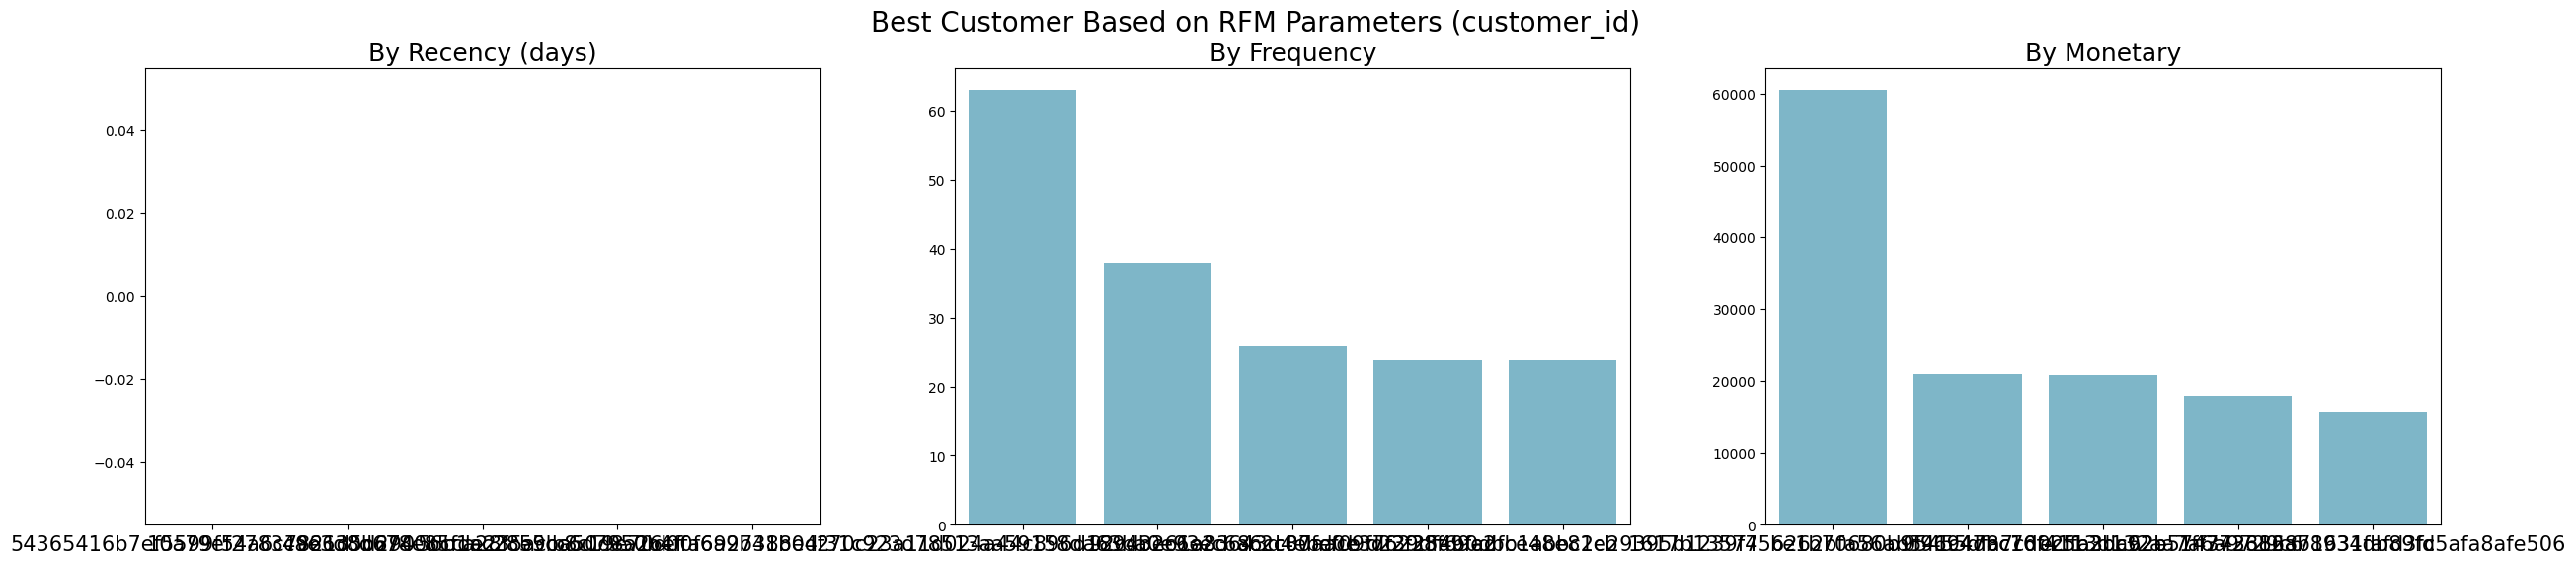

In [566]:
# Assuming 'all_data' is already defined
rfm_df = rfm_analysis(all_dataset)

# Create subplots for RFM analysis
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Define color palette
colors = ["#72BCD4"] * 5  # Color for the bars

# Bar plot for Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Bar plot for Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Bar plot for Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Overall title for the figure
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

- Conclution pertanyaan 1: terdapat 3 tahun dari awal penjualan sampai terakhir. pada tahun 206 hanya memiliki 335 orders, lalu yang paling banyak adalah   pada tahun 2018 dengan 61675 orders

- Conclution pertanyaan 2: pola pembelian adalah mengikuti lokasi strategis. semakin ke kota pinggir atau wilayah yang tidak berada pada kota pusat maka penjualan juga menurun. sao paulo adalah wilayah yang memiliki penjualan paling banyak dengann 14713 orders diikuti dengan rio de janerio dengan 6427 orders. jadi dengan penjualan tertinggi kota tersebut dianggap strategis

- Conclution pertanyaan 3 : beberapa pelanggan banyak membeli produk pada ketegori bed bath table. setiap bulannya rata rata diungguli oleh kategori tersebut. lalu diikuti dengan helath beauty

- Conclution pertanyaan 4 : dalam periode tahun 2017 pada 11 (november) produk degan kategori bed_bath_table memiliki total orders sebanyak 795. ini dianggap kategori produk penjualan tertinggi dalam periode tertentu. sebaliknya yang terendah tidaklah ada, rata rata semua kategori produk pasti pernah memiliki 1 order. dibuktikan dengan "Semua kategori produk memiliki setidaknya satu penjualan." lalu untuk produknya adalah "99a4788cb24856965c36a24e339b6058" pada kategori bed bath table dengan order sebanyak 448.

- Conclution pertanyaan 6 : tentunya ada perbedaan Waktu pengiriman berdasarkan wilayah geografis. customer yang berada pada iomere memiliki rata rata pengiriman pada 2 hari, diikuti dengan acucena, siriji, dan contenda dengan 3 hari pengiriman. lalu yang paling lama adalah customer dengan kota novo brazil dengan rata rata 148 hari, diatasnya ada capinzal do norte dengan 109 hari.

- Conclution pertanyaan 7 : seller terbaik ada pada "4a3ca9315b744ce9f8e9374361493884" dengan total penjualan 2093, namu memiliki rata rata ulasan hanya pada 3.82 saja. lalu seller dengan yang terburuk ada pada "00ab3eff1b5192e5f1a63bcecfee11c8" dengan total penjualan 1 namun memiliki rata ulasan pada 5.0

- Conclution pertanyaan 8 : metode pembayar yang paling banyak adalah pada credit card dengan jumlah 83535 diikuti dengan boleto dengan 22015, lalu voucher dengan 6022 order, dan yang terakhir adalah debit card dengan 1622 order.
